<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/November/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Covid-19 through Pandas, Matplotlib and Seaborn

The Coronavirus outbreak in 2020 can be considered one of the greatest challenges the world has faced in the last century. I have written this article on november 13 and the number of deaths is 1.297.347 in the whole world. In contrary of what many people think, Covid's proagnosis is not so terrible when compared to other deseases. Ebola outbreak in Western Africa in 2014 presented a fatality rate of around 70% in patients between 15 and 44 years old (Yes, only 3 in 10 patients could survive!). The problem about Covid-19 is how contagious it is. Differently from other deseases, such as Ebola that once you have it you need to be hospitalized, Covid-19 is a brief and mild desease for many people and some are even asymptomatics. This way, infected people can move around and infect many others. The desease has its origin in China and in a so globalized world it soon was present in every continent. I don't need to describe how serious this desease was ... I am sure everyone who is reading this article witnessed the caos Covid-19 brought to many countries. 
The Covid-19 outbreak is not the first pandemic the world has faced but it certainly is the first time we can overcome it through technology and of course data. Therefore, that's a great opportunity to analyze and have some insights from this desease. 
For this analysis, we are going to use three Python libraries: Pandas to manipulate the data, Matplotlib and Seaborn for vizualisation. This is a simple exploratory data analysis (EDA) but much can be done and you will see how easy to work with and powerful these libraries are.

Talk briefly about what I did in this EDA

## Data acquisition

The data present in this analysis was taken from the [ourworldindata.org](https://github.com/owid/covid-19-data/tree/master/public/data). The data is related to the whole world until november 17th. It is important to highlight that Covid-19 is new desease and it would be impossible to inform the axact number of Covid cases for example. No organiztion could do it. The main source of this data is the European Centre for Disease Prevention and Control (ECDC). This data is also collected from a variety of sources such as (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information about the data source can be found [here.](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

## Variable dictionary

This dataset features 51 variables. You can have a detailed decription of these variables [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).



## Importing the dataset

As said before, the dataset used in this analysis is obtained at `ourworldindata.org`. You can download this data [here.](https://https://github.com/owid/covid-19-data/tree/master/public/data). Let's import the data from `csv` format into a variable `df`.   

In [2]:
#importing the dataset

import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Exploratory data analysis 

In this section we are going to explore our dataset. Pandas library has some handy commands to make it. Let's do it!



In [3]:
# A very first look on the data

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
# How big is the dataset?

df.shape

print("This data set has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This data set has 59759 rows and 50 columns.


In [5]:
# The columns reprsent the variables of this dataset. Let's see what we have here.

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [6]:
# And let's see what kind of variables there are in the dataset.

df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Well ... Now we have a better sense of how this dataset looks like ... We could figure out how big the dataset is (df.shape), the name of the variables (df.columns) and what kind of variables are present in the dataset (df.dtypes). By taking a look at the first 5 rows it was possible to see that there plenty of null values in aour dataset. And we are going to work on it now. Let's see the percentage of null values in our dataset.

In [7]:
# Knowing the percentage of null values in our dataset

df.isnull().sum()/df.shape[0]

iso_code                              0.005589
continent                             0.011178
location                              0.000000
date                                  0.000000
total_cases                           0.061095
new_cases                             0.015914
new_cases_smoothed                    0.029535
total_deaths                          0.222008
new_deaths                            0.015914
new_deaths_smoothed                   0.029535
total_cases_per_million               0.066082
new_cases_per_million                 0.016985
new_cases_smoothed_per_million        0.030623
total_deaths_per_million              0.226744
new_deaths_per_million                0.016985
new_deaths_smoothed_per_million       0.030623
reproduction_rate                     0.351428
icu_patients                          0.920564
icu_patients_per_million              0.920564
hosp_patients                         0.909286
hosp_patients_per_million             0.909286
weekly_icu_ad

The percentage of null values varies a lot in our dataset. Some variables, such as date and location, present no null value. On the other hand, information about hospitalization (icu_patients, weekly_icu_admissions, etc) is almost non existent, featuring more than 90% of null values. Let's see the ten variables that present null values the most and the least.  

In [8]:
# Checking the varibles that present null values the most

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)[0:11]

weekly_icu_admissions_per_million     0.992570
weekly_icu_admissions                 0.992570
weekly_hosp_admissions                0.987768
weekly_hosp_admissions_per_million    0.987768
icu_patients                          0.920564
icu_patients_per_million              0.920564
hosp_patients_per_million             0.909286
hosp_patients                         0.909286
new_tests                             0.615924
new_tests_per_thousand                0.615924
total_tests                           0.612996
dtype: float64

In [9]:
#Checking the variables that present null values the least

(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)[0:11]

location                  0.000000
date                      0.000000
iso_code                  0.005589
population                0.005589
continent                 0.011178
new_cases                 0.015914
new_deaths                0.015914
new_deaths_per_million    0.016985
new_cases_per_million     0.016985
life_expectancy           0.018441
new_deaths_smoothed       0.029535
dtype: float64

More detailed information is missed but very important information such as `new_cases` and `new_deaths` are almost complete and and therefore much can be analyzed in this data.

One important thing to do is to set the date in the dataset to datetime format so that we can manipulate date through dates ... Let's convert the date into this format.

In [10]:
# Converting the date into datetime format

df["date"] = pd.to_datetime(df.date)

So far we have only had a first impression of the dataset. Finally, we are going to explore and extract information about the COVID-19 outbreak. Let's use the Pandas library to know what are the countries that present higher numbers of deaths and Covid cases. 

In [11]:
# Finding the 5 countries with the highest number of deaths 

df.loc[df.date == "2020-11-18"].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56439,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,175640223.0,1637486.0,530.631,4.947,1500857.0,4.534,9.534,0.105,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7947,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
25306,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,24.237,0.041,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
35428,MEX,North America,Mexico,2020-11-18,1011153.0,1757.0,4660.286,99026.0,165.0,454.857,7842.484,13.627,36.145,768.044,1.280,3.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
56105,GBR,Europe,United Kingdom,2020-11-18,1410732.0,20051.0,25279.571,52745.0,598.0,425.000,20780.896,295.363,372.383,776.964,8.809,6.260,NaN,1430.0,21.065,16485.0,242.834,NaN,NaN,NaN,NaN,34546200.0,336942.0,508.885,4.963,310925.0,4.580,12.299,0.081,tests performed,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [12]:
# Finding the 5 countries with the highest number of Covid-19 cases

df.loc[df.date == "2020-11-18"].sort_values(by="total_cases", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56439,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,175640223.0,1637486.0,530.631,4.947,1500857.0,4.534,9.534,0.105,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
25306,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,24.237,0.041,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7947,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
19416,FRA,Europe,France,2020-11-18,2036755.0,45522.0,29585.143,46273.0,1219.0,580.857,31203.392,697.404,453.249,708.909,18.675,8.899,NaN,4759.0,72.909,32811.0,502.669,NaN,NaN,NaN,NaN,NaN,228445.0,NaN,3.500,251206.0,3.849,8.491,0.118,tests performed (incl. non-PCR),78.70,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
44642,RUS,Europe,Russia,2020-11-18,1991998.0,20985.0,24984.143,34387.0,456.0,460.857,13649.949,143.797,171.201,235.633,3.125,3.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70653231.0,577345.0,484.144,3.956,563253.0,3.860,22.544,0.044,tests performed,47.69,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


That's a good first approach to know more about the Covid-19 scenario in the world. However, there is a better way to display this information. Let's plot it! To do so, let's use `Matplotlib` library. Let's first plot a histogram of the total number of cases and deaths.

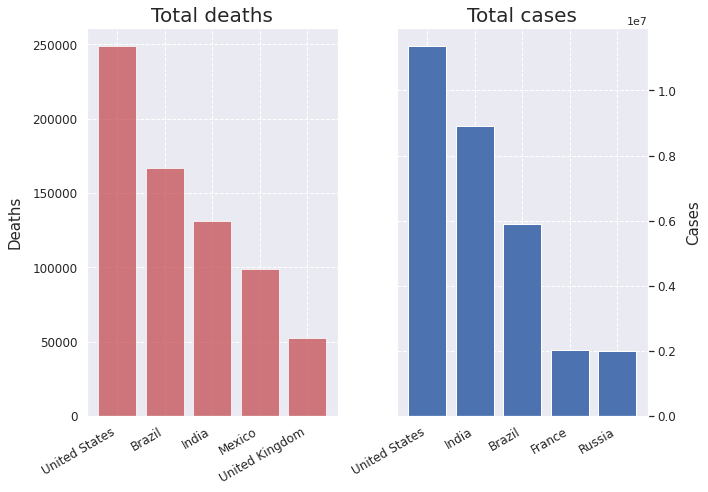

In [13]:
# importing Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# creating a graph of total number of cases
sns.set()

top5_total_deaths = df.loc[df.date == "2020-11-18", ["location", "total_deaths"]].sort_values(by="total_deaths", ascending=False)[1:6]
top5_total_cases = df.loc[df.date == "2020-11-18", ["location", "total_cases"]].sort_values(by="total_cases", ascending=False)[1:6]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax1.bar(x=top5_total_deaths["location"], height=top5_total_deaths["total_deaths"], facecolor="r", alpha=0.75)
ax1.set_title("Total deaths", fontsize = 20)
ax1.set_ylabel("Deaths", fontsize=15, labelpad=10, )
ax1.grid(ls="--")
ax1.tick_params(labelsize=12)


ax2.bar(x="location", height="total_cases", data = top5_total_cases)
ax2.set_title("Total cases", fontsize=20)
ax2.set_ylabel("Cases", fontsize=15, labelpad=10)
ax2.grid(ls="--")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(labelsize=12)


fig.autofmt_xdate()

plt.tight_layout()


Well ... In this first analysis, by comparing number of cases and deaths, it possible to have a good sense of the mortality rate of these countries. Comparing India and Brazil, for example, it is clear that mortality rate in Brazil is higher. It is expected that India presents higher number of cases once its population is higher than 1 billion but the number of deaths is considerable lower than Brazil's number. Why is that? In this simple analysis it also noticeable that Mexico also presents high mortality rate. It is not even in the top five contries with higher number of cases but presents almost 100 thousand deaths! On the other hand, european countries such as France and Russia present lower mortality rate. It does not apply to UK. This is certainly related to England's health policy response that presented more flexible social distancing rules in the beginning of the pandemic when compared to other european countries. 

Let's now analyze the evolution of the number of cases and deaths of these countries. But first let's see the total number of deaths and cases in the world.

In [14]:
#Obtaining part of the dataset to be used in the world analysis

cases_world = df.loc[df.location == "World", ["date","total_cases"]]
deaths_world = df.loc[df.location=="World", ["date","total_deaths"]]


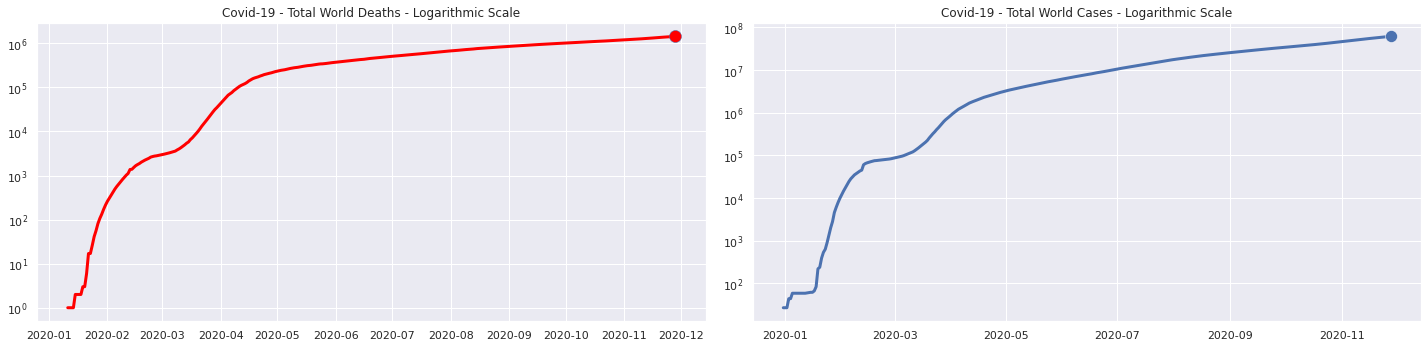

In [15]:
#Line plot for total deaths and cases in the world

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))


ax2.plot(cases_world["date"], cases_world["total_cases"], linewidth=3, color=None, 
         marker="o", markersize=12, markeredgecolor="w", markeredgewidth=0.5, markevery=[-1])
ax2.set_yscale("log")
ax2.set_title("Covid-19 - Total World Cases - Logarithmic Scale")

ax1.plot(deaths_world["date"], deaths_world["total_deaths"], linewidth=3, color="red", 
         marker="o", markersize=12, markeredgecolor="b", markeredgewidth=0.5, markevery=[-1])
ax1.set_yscale("log")
ax1.set_title("Covid-19 - Total World Deaths - Logarithmic Scale")
plt.tight_layout()

Because our data varies a lot, the number of cases and deaths of Covid-19 has been represented in a logarithmic scale. This result shows that the increase of death follows suit the increase of cases. February presented higher rate of cases and deaths. It may be related to the beginning of the Coronavirus outbreak when nobody had idea of how serious the desease was. Yet it was winter in Europe that is when viral diseases are more common. 

Let's now plot the evolution of Covid-19 considering the top five countries in deaths and cases. From here we are going focus on Brazil in this analysis.

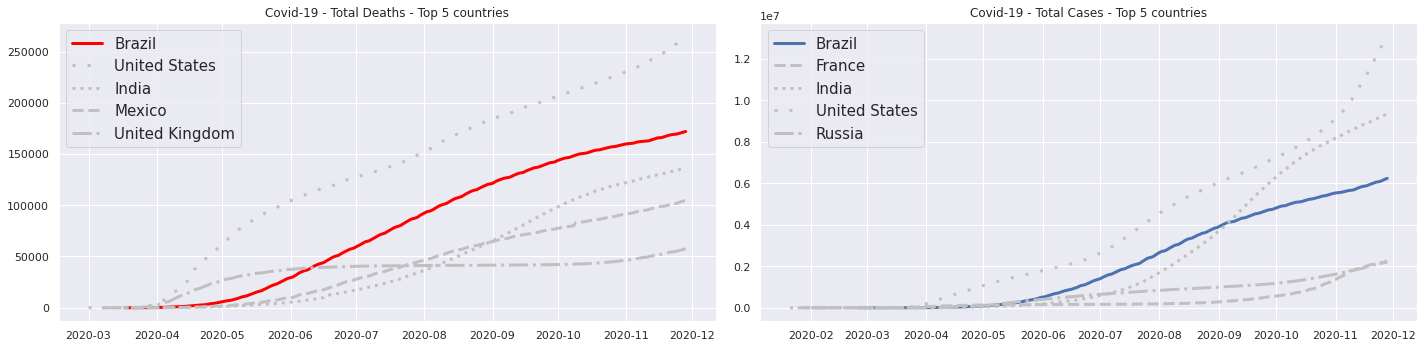

In [16]:
cases_brazil = df.loc[df.location=="Brazil", ["date", "total_cases"]]
deaths_brazil = df.loc[df.location=="Brazil", ["date", "total_deaths"]]

cases_usa = df.loc[df.location=="United States", ["date", "total_cases"]]
deaths_usa = df.loc[df.location=="United States", ["date", "total_deaths"]]

cases_india = df.loc[df.location=="India", ["date", "total_cases"]]
deaths_india = df.loc[df.location=="India", ["date", "total_deaths"]]

cases_france = df.loc[df.location=="France", ["date", "total_cases"]]

cases_russia = df.loc[df.location=="Russia", ["date", "total_cases"]]

deaths_mexico = df.loc[df.location=="Mexico", ["date", "total_deaths"]]

deaths_uk = df.loc[df.location=="United Kingdom", ["date", "total_deaths"]]



fig, (x1, x2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

#Plotting the cases

x2.plot(cases_brazil["date"], cases_brazil["total_cases"],linewidth=3, color=None, 
         markeredgecolor="w", markeredgewidth=0.5, label="Brazil")
x2.plot(cases_france["date"], cases_france["total_cases"], linewidth=3, ls="--", color="#C0C0C0", label="France")
x2.plot(cases_india["date"], cases_india["total_cases"], linewidth=3, ls=":", color="#C0C0C0", label="India")
x2.plot(cases_usa["date"], cases_usa["total_cases"], linewidth=3, ls=(0, (1, 4)), color="#C0C0C0", label="United States")
x2.plot(cases_russia["date"], cases_russia["total_cases"], linewidth=3, ls="-." , color="#C0C0C0", label="Russia")
x2.legend(loc="upper left", prop={'size': 15})
x2.set_title("Covid-19 - Total Cases - Top 5 countries")

#plotting the deaths

x1.plot(deaths_brazil["date"], deaths_brazil["total_deaths"],linewidth=3, color="red", 
         markeredgecolor="w", markeredgewidth=0.5, label="Brazil")
x1.plot(deaths_usa["date"], deaths_usa["total_deaths"], linewidth=3, ls=(0, (1, 4)), color="#C0C0C0", label="United States")
x1.plot(deaths_india["date"], deaths_india["total_deaths"], linewidth=3, ls=":", color="#C0C0C0", label="India")
x1.plot(deaths_mexico["date"], deaths_mexico["total_deaths"], linewidth=3,ls="--" , color="#C0C0C0", label="Mexico")
x1.plot(deaths_uk["date"], deaths_uk["total_deaths"], linewidth=3, ls="-." , color="#C0C0C0", label="United Kingdom")
x1.legend(loc="upper left", prop={'size': 15})
x1.set_title("Covid-19 - Total Deaths - Top 5 countries")



plt.tight_layout()


It is known that the Covid-19 first stroke eastern countries, Europe and later USA and south american countries. When was the first case in Brazil? Let's the very beginning of the dataset ... 

In [17]:
df[df.location=="Brazil"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7624,BRA,South America,Brazil,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7625,BRA,South America,Brazil,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7626,BRA,South America,Brazil,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7627,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7628,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


Well ... By the beginning of 2020 there was no recorded Covid-19 case in Brazil. Through a better data manipulation it is possible to obtain this information. Let's do it.

In [18]:
# Finding the first Covid-19 case in Brazil

Brazil = df[df.location=="Brazil"]

first_case_brazil = Brazil[Brazil.total_cases==1].iloc[0,3]

print("Brazil's first case was on {}.".format(first_case_brazil.date()))


Brazil's first case was on 2020-02-26.


Let's find now the first death in Brazil ... 

In [19]:
# Finding the first Covid-19 death in Brazil

first_death_brazil = Brazil[Brazil.total_deaths==1].iloc[0,3]

print("Brazil's first death happened on {}.".format(first_death_brazil.date()))

Brazil's first death happened on 2020-03-18.


Right ... Let's see how many days it took from the first case and the first death in Brazil.

In [20]:
# Number of days from the first case and first death

delta = first_death_brazil-first_case_brazil

print("It took {} days to have the first death in Brazil when the first Covid-19 case was recorded.".format(delta.days))


It took 21 days to have the first death in Brazil when the first Covid-19 case was recorded.


The next analysis will be the participation the top 3 countries have had in deaths and cases of Covid-19. To do so, we are going to use [waffle charts](https://pywaffle.readthedocs.io/en/latest/) for visualization. Let's do it!

In [21]:
# Installing Waffle chart 

!pip install pywaffle -q


     |████████████████████████████████| 532kB 5.9MB/s 


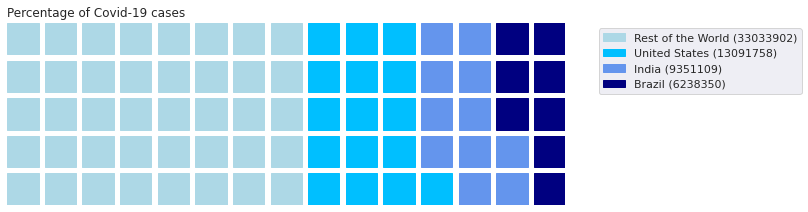

In [33]:
from pywaffle import Waffle

# Calculating the number of cases and deaths - First try

world = df.loc[df.location=="World"]
total_cases_world = world["total_cases"].max()
total_deaths_world = world["total_deaths"].max()

# USA
total_cases_usa = cases_usa["total_cases"].max()
total_deaths_usa = deaths_usa["total_deaths"].max()

# Brazil
total_cases_brazil = cases_brazil["total_cases"].max()
total_deaths_brazil = deaths_brazil["total_deaths"].max()

# India
total_cases_india = cases_india["total_cases"].max()
total_deaths_india = deaths_india["total_deaths"].max()

#Resto of the World (rotw)
total_cases_rotw = total_cases_world - total_cases_usa - total_cases_brazil - total_cases_india
total_deaths_rotw = total_deaths_world - total_deaths_usa - total_deaths_india - total_deaths_brazil

# Creating a data frame from these information 
dfw = pd.DataFrame(data={"Countries": ["Rest of the World", "United States", "India", "Brazil"],
                   "Total Cases": [total_cases_rotw, total_cases_usa, total_cases_india, total_cases_brazil],
                   "Total Deaths": [total_deaths_rotw, total_deaths_usa, total_deaths_brazil, total_deaths_india],})

# Creating the Waffle Chart - Cases
data1 = {"Rest of the World": dfw.iloc[0,1], "United States": dfw.iloc[1,1], "India": dfw.iloc[2,1], "Brazil": dfw.iloc[3,1]}
fig = plt.figure(
                FigureClass=Waffle,
                 rows = 5,
                 columns = 15,
                 figsize = (10,5),
                 colors = ["#ADD8E6", "#00BFFF", "#6495ED", "#000080"],
                 labels = [f"Rest of the World ({int(total_cases_rotw)})", 
                                    f"United States ({int(total_cases_usa)})",
                                    f"India ({int(total_cases_india)})",
                                    f"Brazil ({int(total_cases_brazil)})"],
                 title={"label":"Percentage of Covid-19 cases", "loc":"left"},
                 values=data1, 
                 legend={"loc": "upper left",'bbox_to_anchor': (1.05, 1)},
                                
                 )
fig.set_tight_layout(False)
plt.show()

#

Waffle Charts give us a very good idea of the contribution of these countries. However, lets creat a simple data frame with the percentage of contribution. 

In [23]:
# Creating a DataFrame of percentage of contribution

dfc = pd.DataFrame(data={"Countries": ["United States", "India", "Brazil"],
                    "Total Cases": [total_cases_usa, total_cases_india, total_cases_brazil],
                    "Country %": [round(total_cases_usa/total_cases_world*100,2), round(total_cases_india/total_cases_world*100,2), round(total_cases_brazil/total_cases_world*100,2)]})

dfc


,Countries,Total Cases,Country %
0,United States,13091758.0,21.21
1,India,9351109.0,15.15
2,Brazil,6238350.0,10.11


Great ... Let's do the same analysis for the total number of death.

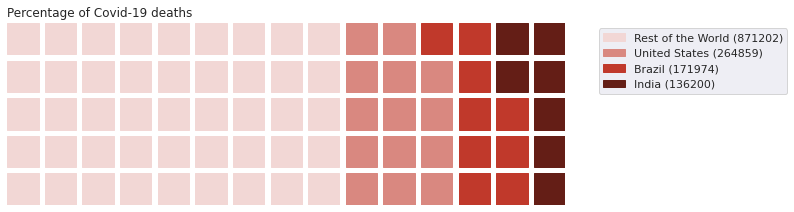

In [39]:
# Creating the Waffle Chart - Deaths
data2 = {"Rest of the World": dfw.iloc[0,2], "United States": dfw.iloc[1,2], "India": dfw.iloc[2,2], "Brazil": dfw.iloc[3,2]}
fig = plt.figure(
                FigureClass=Waffle,
                 rows = 5,
                 columns = 15,
                 figsize = (10,5),
                 colors = ["#F2D7D5", "#D98880", "#C0392B", "#641E16"],
                 labels = [f"Rest of the World ({int(total_deaths_rotw)})", 
                          f"United States ({int(total_deaths_usa)})",
                          f"Brazil ({int(total_deaths_brazil)})",
                          f"India ({int(total_deaths_india)})",],
                 title={"label":"Percentage of Covid-19 deaths", "loc":"left"},
                 values=data2, 
                 legend={"loc": "upper left",'bbox_to_anchor': (1.05, 1)},
                                
                 )
fig.set_tight_layout(False)
plt.show()


In [43]:
# Creating a DataFrame of percentage of contribution

dfd = pd.DataFrame(data={"Countries": ["United States", "Brazil", "India"],
                    "Total Deaths": [total_deaths_usa, total_deaths_india, total_deaths_brazil],
                    "Country %": [round(total_deaths_usa/total_deaths_world*100,2), round(total_deaths_brazil/total_deaths_world*100,2), round(total_deaths_india/total_deaths_world*100,2)]})

dfd

,Countries,Total Deaths,Country %
0,United States,264859.0,18.34
1,Brazil,136200.0,11.91
2,India,171974.0,9.43


In [40]:
dfw

,Countries,Total Cases,Total Deaths
0,Rest of the World,33033902.0,871202.0
1,United States,13091758.0,264859.0
2,India,9351109.0,171974.0
3,Brazil,6238350.0,136200.0


Let's now see how the the evolution of the number of cases and deaths along the year for these countries. To accomplish this task let's consider a 7-day rolling average graph. 

The first thing is to create a dataframe containing total data from the world and the other countries. Let's do it.

In [71]:
# Choosing the columns that matters to us

col = ["location","date", 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']

# Creating the DataFrames 

df_world = df[df.location=="World"]
df_usa = df[df["location"]=="United States"]
df_brazil = df[df.location == "Brazil"]
df_india = df[df.location == "India"]

#Merging the DataFrames

df_countries = (df_world.merge(df_usa, how="outer").merge(df_brazil, how="outer").merge(df_india, how="outer")) 

df_countries_up = df_countries[col]

df_countries_up



,location,date,total_cases,total_deaths,new_cases,new_deaths
0,World,2019-12-31,27.0,NaN,27.0,0.0
1,World,2020-01-01,27.0,NaN,0.0,0.0
2,World,2020-01-02,27.0,NaN,0.0,0.0
3,World,2020-01-03,44.0,NaN,17.0,0.0
4,World,2020-01-04,44.0,NaN,0.0,0.0
...,...,...,...,...,...,...
1331,India,2020-11-24,9177840.0,134218.0,37975.0,480.0
1332,India,2020-11-25,9222216.0,134699.0,44376.0,481.0
1333,India,2020-11-26,9266705.0,135223.0,44489.0,524.0
1334,India,2020-11-27,9309787.0,135715.0,43082.0,492.0


In [74]:
# Separating the dataframe by countries

df_usa_part = df_countries_up.loc[df_countries_up.location == "United States"]
df_brazil_part = df_countries_up.loc[df_countries_up.location == "Brazil"]
df_india_part = df_countries_up.loc[df_countries_up.location == "India"]

Great ... The following steps are summarized below:


* To calculate each country's participation for each column;

* To fill the null values left by divisions by zero with zero;

* To drop the columns that are not usable anymore;

* To apply an equation to transform each column a 7-day average;

* To fill null values after  caclculating the moving average with zero.



In [ ]:
# Calculating each country's participation for each column

df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7624,BRA,South America,Brazil,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7625,BRA,South America,Brazil,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7626,BRA,South America,Brazil,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7627,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7628,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,BRA,South America,Brazil,2020-11-24,6087608.0,16207.0,30163.429,169485.0,302.0,495.857,28639.560,76.247,141.906,797.354,1.421,2.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7954,BRA,South America,Brazil,2020-11-25,6118708.0,31100.0,29564.286,170115.0,630.0,488.000,28785.872,146.312,139.087,800.317,2.964,2.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7955,BRA,South America,Brazil,2020-11-26,6166606.0,47898.0,31536.714,170769.0,654.0,473.429,29011.212,225.339,148.367,803.394,3.077,2.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7956,BRA,South America,Brazil,2020-11-27,6204220.0,37614.0,31779.000,171460.0,691.0,485.571,29188.169,176.958,149.506,806.645,3.251,2.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [ ]:
# Creating multiple Waffle Charts

fig = plt.figure(FigureClass=Waffle,
                 plots={
                     "Total Cases":{
                         "values":  dfw.iloc[:4,1],
                         "labels": [f"Rest of the World ({int(total_cases_rotw)})", 
                                    f"United States ({int(total_cases_usa)})",
                                    f"India ({int(total_cases_india)})",
                                    f"Brazil ({int(total_cases_brazil)})"],
                        "legend": {'loc': 'upper left', 'bbox_to_anchor':(1.1,1)},
                        "title": {"label":"Participation of the countries with higher total number of Covid-19 cases", "fontsize": 14, "loc":"left"},
                        
                     },
                     "Total Deaths":{
                         "values":  dfw.iloc[:4,2],
                         "labels": [f"Rest of the World ({int(total_deaths_rotw)})", 
                                    f"United States ({int(total_deaths_usa)})",
                                    f"India ({int(total_deaths_india)})",
                                    f"Brazil ({int(total_deaths_brazil)})"],
                        "legend": {'loc': 'upper left', 'bbox_to_anchor':(1.1,1)},
                        "title": {"label":"Participation of the countries with higher total number of Covid-19 deaths", "fontsize": 14, "loc":"left"},
                 }
                 },
                 rows=5, 
                 columns=15,
                 colors=["#ADD8E6", "#00BFFF", "#6495ED", "#000080"] ,
                 figsize=(20, 10)          
                         
                 )
fig.set_tight_layout(False)
plt.show()

In [ ]:
dfw

In [ ]:
dfw.loc[dfw.Countries=="Rest of the World", ["Total Cases"]]

In [ ]:
# GDP and Covid-19 deaths

brazil_gdp = df.loc[df.location=="Brazil", ["date","gdp_per_capita"]].dtypes
